In [3]:
import csv
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import scipy

In [2]:
#Ex 1/2
df = pd.read_csv('data1.csv', index_col='Unnamed: 0')


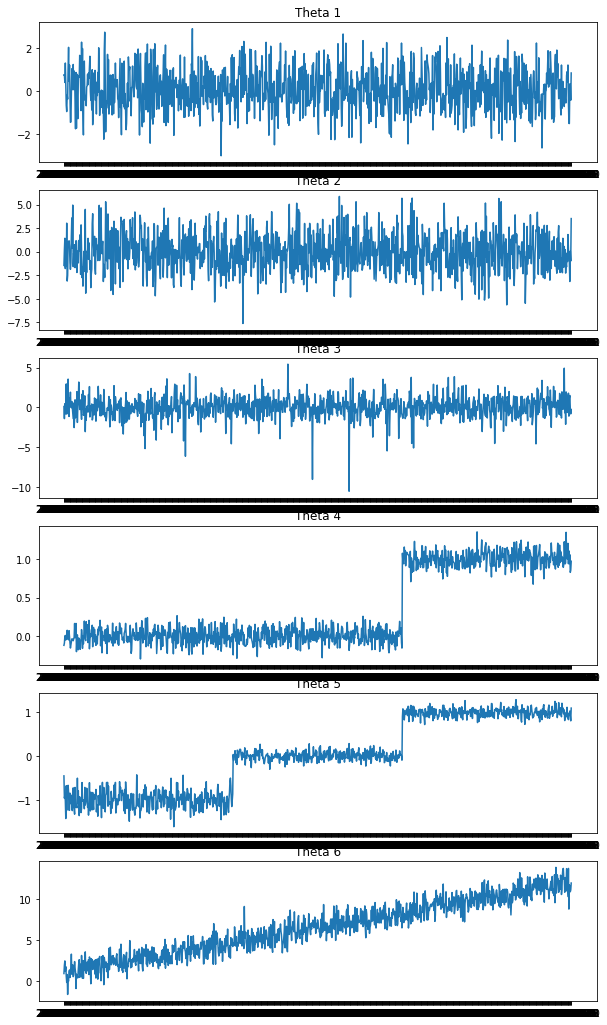

In [3]:
#Ex 3
fig, axs = plt.subplots(len(df.columns))
fig.set_size_inches(10,18)
for i in range(len(df.columns)):
    axs[i].plot(df.iloc[:, i])
    j=i+1
    axs[i].set_title("Theta {}".format(j))

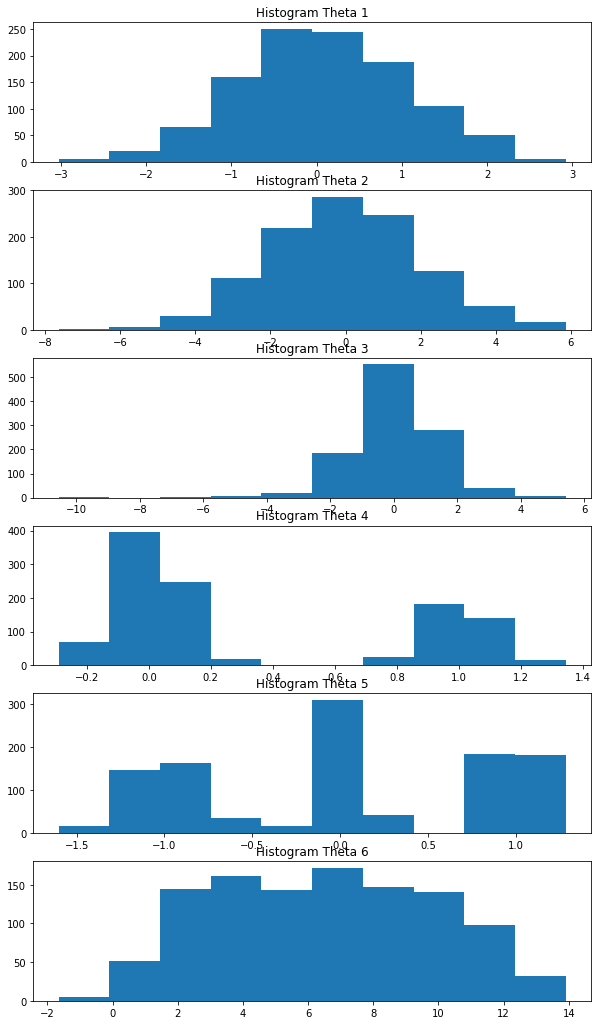

In [4]:
#Ex 4
fig, axs = plt.subplots(len(df.columns))
fig.set_size_inches(10,18)
for i in range(len(df.columns)):
    axs[i].hist(df.iloc[:, i])
    j=i+1
    axs[i].set_title("Histogram Theta {}".format(j))

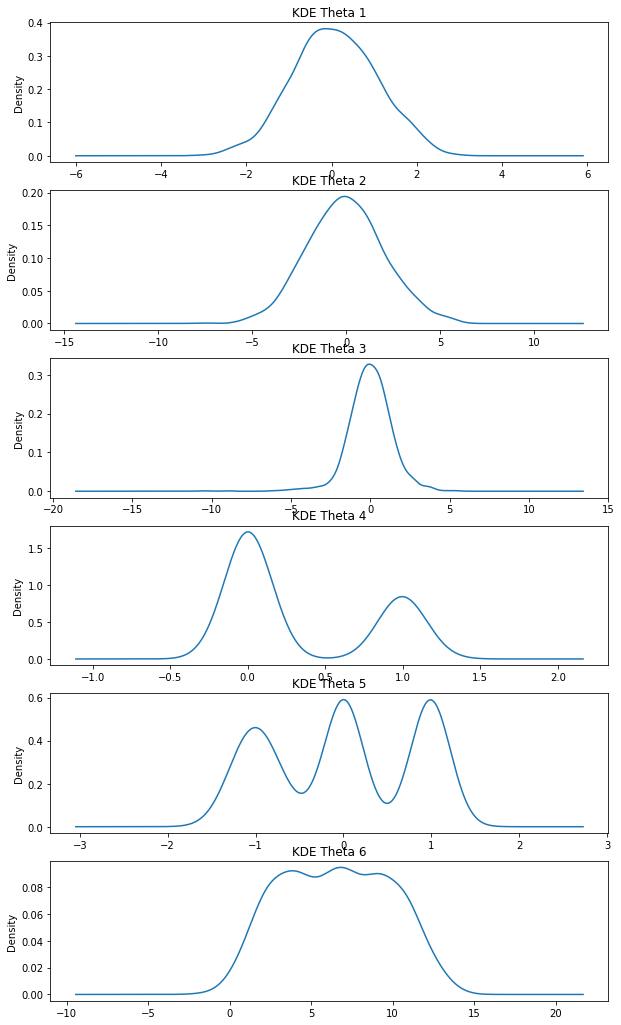

In [5]:
#Ex 5
fig, axs = plt.subplots(len(df.columns))
fig.set_size_inches(10,18)
for i in range(len(df.columns)):
    df.iloc[:, i].plot.kde(ax=axs[i])
    j=i+1
    axs[i].set_title("KDE Theta {}".format(j))

             theta_1   theta_2   theta_3   theta_4       Sub
2018-01-01  0.682693 -3.091767 -0.475717 -0.238530  0.921223
2018-01-02 -0.283107 -0.979955  1.233933  0.158031 -0.441138
2018-01-03  1.572221 -2.033528  2.196317  0.041347  1.530874
2018-01-04 -1.042981  0.651530  1.060125  0.064832 -1.107813
2018-01-05 -1.392614 -2.570905 -0.600063 -0.015025 -1.377588
...              ...       ...       ...       ...       ...
2018-12-27  0.473556 -0.651265 -0.523058  0.076798  0.396757
2018-12-28  1.433117  0.325632  0.905920  0.028891  1.404226
2018-12-29  0.285428 -0.476290  1.082404  0.111482  0.173946
2018-12-30  2.249273 -1.233575 -0.666277 -0.080878  2.330151
2018-12-31  0.316409  5.673544 -0.964592 -0.150844  0.467253

[365 rows x 5 columns]


<AxesSubplot:ylabel='Density'>

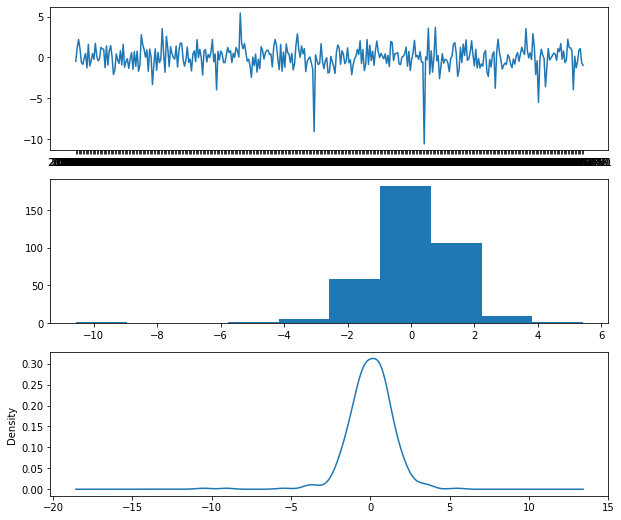

In [7]:
#Ex 6
dfnew = df.loc['20170101':'20181231',['theta_1','theta_2','theta_3','theta_4']]
dfnew["Sub"]=dfnew['theta_1']-dfnew['theta_4']
fig, axs = plt.subplots(3)
fig.set_size_inches(10,9)
axs[0].plot(dfnew.iloc[:, 2])
axs[1].hist(dfnew.iloc[:, 2])
dfnew.iloc[:, 2].plot.kde(ax=axs[2])


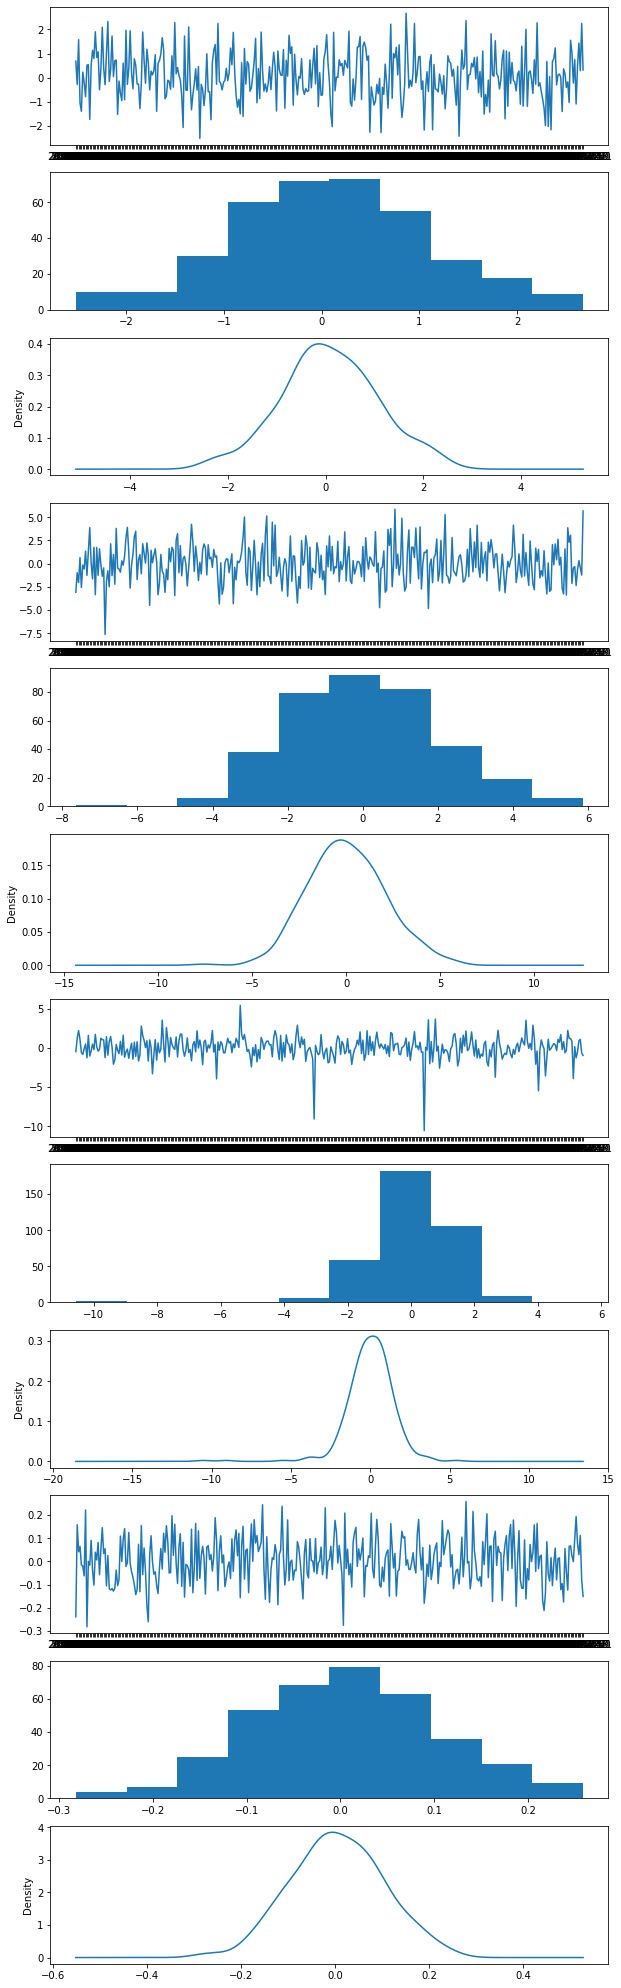

In [10]:
fig, axs = plt.subplots(12)
fig.set_size_inches(10,36)

for i in range(len(dfnew.columns)-1):
    axs[3*i].plot(dfnew.iloc[:, i])
    axs[3*i+1].hist(dfnew.iloc[:, i])
    dfnew.iloc[:, i].plot.kde(ax=axs[3*i+2])

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


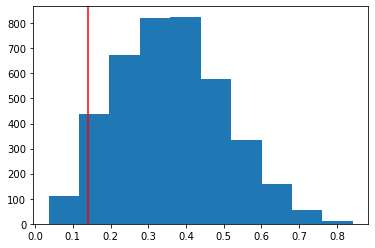

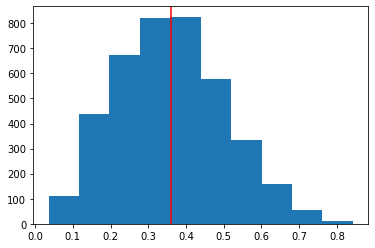

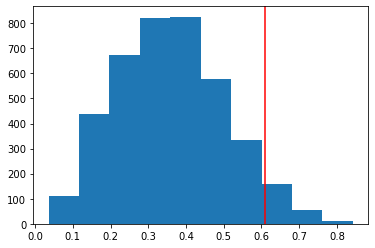

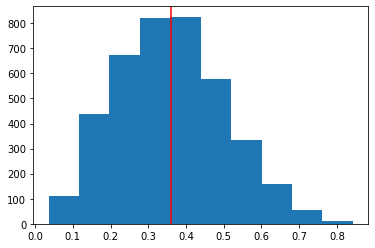

In [16]:
import random
import cmdstanpy

f=6
l=3
stan_y = [0]*f + [1]*l
random.shuffle(y)
data = {'N': f+l,'y': y}
model = cmdstanpy.CmdStanModel(stan_file='bern_1.stan')
sample = model.sample(data)
theta = sample.stan_variable('theta')
summary = sample.summary()
plt.figure()
plt.hist(theta)
plt.axvline(summary['5%']['theta'], color='r')
plt.figure()
plt.hist(theta)
plt.axvline(summary['50%']['theta'], color='r')
plt.figure()
plt.hist(theta)
plt.axvline(summary['95%']['theta'], color='r')
plt.figure()
plt.hist(theta)
plt.axvline(theta.mean(), color='r')

plt.show()